In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 22})

In [2]:
import ugradio
from tqdm import tqdm

In [137]:
data = []
n = 100
for i in tqdm(range(n)):
    line_off_data = ugradio.pico.capture_data('50mV', dual_mode=True, divisor=1, nblocks=100)
    data.append(line_off_data)

100%|██████████| 100/100 [10:43<00:00,  6.43s/it]


In [140]:
data = np.array(data)

In [6]:
def calc_avg_fft(complex_data):
    complex_data = complex_data.reshape(-1,4000)
    fft_data = np.fft.fft(complex_data)
    pk = np.abs(fft_data)**2
    avg_fft = np.mean(pk, axis=0)

    fft_freq = np.fft.fftshift(np.fft.fftfreq(len(complex_data[0,:]), d=1/(62.5e6)))
    return np.fft.fftshift(avg_fft), fft_freq/1e6

In [141]:
complex_data = (data[:,0,:,:] - 1j*data[:,1,:,:]) / 2**16
complex_data = complex_data.reshape(-1,4000)
complex_data.shape

(40000, 4000)

In [142]:
fft_data = np.fft.fft(complex_data)
pk = np.abs(fft_data)**2
avg_fft = np.mean(pk, axis=0)
    
fft_freq = np.fft.fftshift(np.fft.fftfreq(len(complex_data[i,:]), d=1/(62.5e6)))

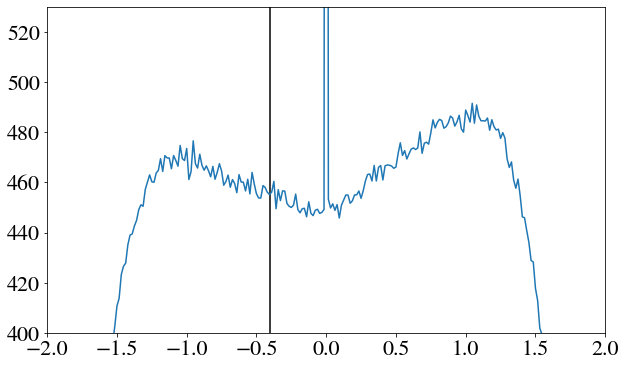

In [144]:
plt.figure(figsize=(10,6))
plt.plot(fft_freq/1e6, np.fft.fftshift(avg_fft))
plt.xlim(-2,2)
plt.ylim(400, 530)
plt.vlines(-0.4, min(avg_zenith), max(avg_zenith))
# plt.semilogy()
plt.show()

In [145]:
np.save('orion_complex_data_40k_4k_off.npy',complex_data)

In [114]:
zenith = np.load('zenith_complex_data_40k_4k.npy')
avg_zenith, freqs = calc_avg_fft(zenith)


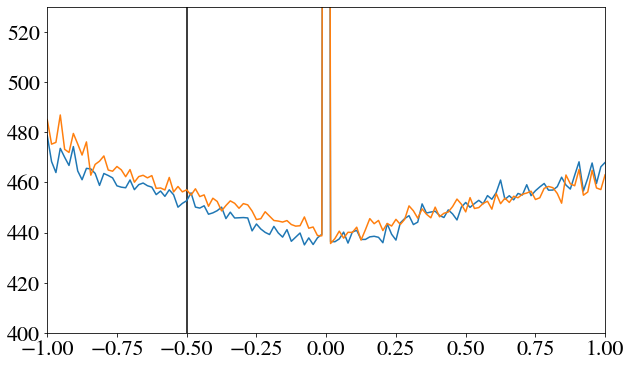

In [135]:
plt.figure(figsize=(10,6))
plt.plot(fft_freq/1e6, np.fft.fftshift(avg_fft))
plt.plot(freqs, (490/420)*avg_zenith)
plt.xlim(-1,1)
plt.ylim(400, 530)
plt.vlines(-0.5, min(avg_zenith), max(avg_zenith))
# plt.semilogy()
plt.show()

# On vs. Off

In [4]:
on_data = np.load("orion_complex_data_40k_4k.npy")
off_data = np.load("orion_complex_data_40k_4k_off.npy")

In [7]:
avg_on, freqs = calc_avg_fft(on_data)
avg_off, freqs = calc_avg_fft(off_data)

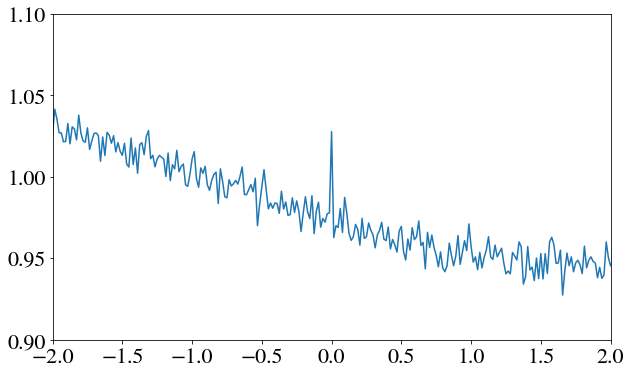

In [15]:
plt.figure(figsize=(10,6))
plt.plot(freqs, avg_on/avg_off)
plt.xlim(-2,2)
plt.ylim(0.9, 1.1)
# plt.vlines(-0.4, min(avg_on), max(avg_on))
# plt.semilogy()
plt.show()